In [1]:
import imageio as iio
import numpy as np
import matplotlib.pyplot as plt


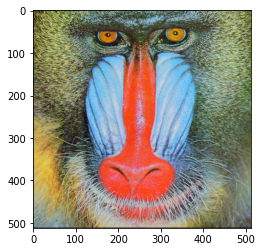

In [2]:
input_image = iio.imread('baboon.png')

plt.imshow(input_image)
plt.show()

In [3]:
# toy_image = np.array([[0, 127, 255], [2, 4, 64]], dtype = np.uint8)
toy_image = np.zeros(144).reshape(4,12,3).astype(np.uint8)
print(toy_image.shape)

(4, 12, 3)


In [4]:
# a[0,:8,0] = np.array([0,0,0,0,0,0,0,1]) # changing first element to 1
# a[0,8:16,0] = np.array([1,1,1,1,1,1,1,1])
# a[0,8:16,1] = np.array([1,1,1,1,1,1,1,1])
a = np.unpackbits(toy_image, axis = 1)
print(a.shape)

a[0:2,0,0:2] = np.array([[0,1], [1,0]], dtype = np.uint8)

(4, 96, 3)


(4, 12, 3)


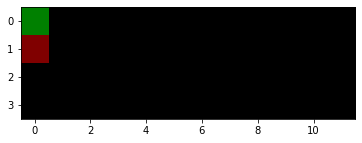

In [6]:
b = np.packbits(a, axis = 1)
print(b.shape)
plt.imshow(b)

In [3]:
def text2bits(text, encoding='utf-8', errors='surrogatepass'):
    """
    Converts a given text (string) to its binary representation in the ASCII code.
    Reference: https://stackoverflow.com/questions/7396849/convert-binary-to-ascii-and-vice-versa    
    """
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def bits2text(bits, encoding='utf-8', errors='surrogatepass'):
    """
    Converts a given bit sequence in ASCII code into a string.
    Reference: https://stackoverflow.com/questions/7396849/convert-binary-to-ascii-and-vice-versa
    """
    n = int(bits, 2)
    return n.to_bytes((n.bit_length() + 7) // 8, 'big').decode(encoding, errors) or '\0'

In [38]:
text = 'batatinha quando nasce'
bin_text = text2bits(text)

bits_image = np.unpackbits(input_image, axis = 1)
bits_image_original = bits_image.copy()
print(bits_image.shape)
print(bin_text)
print('quantidade de caracteres =', len(bin_text))


(512, 4096, 3)
01100010011000010111010001100001011101000110100101101110011010000110000100100000011100010111010101100001011011100110010001101111001000000110111001100001011100110110001101100101
quantidade de caracteres = 176


In [10]:
arr_text = np.array([int(char) for char in bin_text], dtype = np.uint8)

In [11]:
bits_int = ''.join(str(v) for v in list(bits_image_original[0,8:8*(1 + 1),0]))
print('Sequencia de bits da imagem original: ', bits_int)
print('Correspondente inteiro da imagem original: ', int(bits_int, 2))
print('True inteiro da original: ', input_image[0,1,0])

Sequencia de bits da imagem original:  00111111
Correspondente inteiro da imagem original:  63
True inteiro da original:  63


In [96]:
text = '\x00'
bin_text = text2bits(text)

print(bin_text)
print('quantidade de caracteres =', len(bin_text))
bits2text(bin_text)


00000000
quantidade de caracteres = 8


'\x00'

In [12]:
bits_image_original[0,7:8*(1+1):8,0]

Array([0, 1], dtype=uint8)

In [13]:
teste = np.arange(30).reshape(2,15)
print(teste)
print('--------------------')
teste[0:0,0::2] = 1

print(teste)
print(teste[0:0,0::2])

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]]
--------------------
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
 [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]]
[]


In [14]:
bits_image[0,7:8*(len(bin_text)):8,0] = arr_text

In [17]:
bits_int = ''.join(str(v) for v in list(bits_image[0,:8,0]))
print('Sequencia de bits da imagem original: ', bits_int)
print('Correspondente inteiro da imagem original: ', int(bits_int, 2))

Sequencia de bits da imagem original:  10100100
Correspondente inteiro da imagem original:  164


In [19]:
for i in range(5):
    print('Imagem original {} -   Canal R: {}\t Canal G: {}\t Canal B: {}'.format(i, input_image[0,i,0], input_image[0,i,1], input_image[0,i,2]))
    print('Imagem modificada {} - Canal R: {}\t Canal G: {}\t Canal B: {}'.format(i,coded_image[0,i,0], coded_image[0,i,1], coded_image[0,i,2]))


Imagem original 0 -   Canal R: 164	 Canal G: 150	 Canal B: 71
Imagem modificada 0 - Canal R: 164	 Canal G: 150	 Canal B: 71
Imagem original 1 -   Canal R: 63	 Canal G: 57	 Canal B: 31
Imagem modificada 1 - Canal R: 63	 Canal G: 57	 Canal B: 31
Imagem original 2 -   Canal R: 75	 Canal G: 43	 Canal B: 10
Imagem modificada 2 - Canal R: 75	 Canal G: 43	 Canal B: 10
Imagem original 3 -   Canal R: 95	 Canal G: 94	 Canal B: 46
Imagem modificada 3 - Canal R: 94	 Canal G: 94	 Canal B: 46
Imagem original 4 -   Canal R: 157	 Canal G: 140	 Canal B: 73
Imagem modificada 4 - Canal R: 156	 Canal G: 140	 Canal B: 73


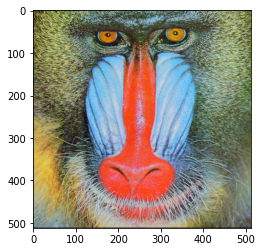

In [18]:
coded_image = np.packbits(bits_image, axis = 1)
plt.imshow(coded_image)
iio.imwrite('secret_baboon.png', coded_image)

In [20]:
coded_image.shape

(512, 512, 3)

In [21]:
decoding = np.unpackbits(coded_image, axis = 1)
message = ''.join(str(v) for v in list(decoding[0,7:8*(len(bin_text)):8,0]))
bits2text(message)

'batatinha quando nasce'

Generalizando para uma mensagem de tamanho qualquer

In [116]:
with open ("secret_message.txt", "r") as myfile:
    data=myfile.readlines()

data = ''.join(data)
bits_secret_message = text2bits(data)
arr_secret_message = np.array([int(char) for char in bits_secret_message], dtype = np.uint8)
print(arr_secret_message.shape)
print(input_image.shape)
print(len(bits_secret_message))

(996824,)
(512, 512, 3)
996824


In [119]:
bits_secret_message = text2bits(data)
arr_secret_message = np.array([int(char) for char in bits_secret_message], dtype = np.uint8)
arr_secret_message[-8:]

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [118]:
data += '\0'
data

'IN THE SHADE of the house, in the sunshine of the\nriverbank near the boats, in the shade of the Sal-\nwood forest, in the shade of the fig tree is where Sid-\ndhartha grew up, the handsome son of the Brahman, the\nyoung falcon, together with his friend Govinda, son of\na Brahman. The sun tanned his light shoulders by the\nbanks of the river when bathing, performing the sacred\nablutions, the sacred offerings. In the mango grove,\nshade poured into his black eyes, when playing as a boy,\nwhen his mother sang, when the sacred offerings were\nmade, when his father, the scholar, taught him, when the\nwise men talked. For a long time, Siddhartha had been\npartaking in the discussions of the wise men, practis-\ning debate with Govinda, practising with Govinda the\nart of reflection, the service of meditation. He already\nknew how to speak the Om silently, the word of words,\nto speak it silently into himself while inhaling, to speak\nit silently out of himself while exhaling, with all the\

In [8]:
512*512*3

786432

In [25]:
# 0 in (bits_image[:, bits_plane['1']::8, 0:band_index]).shape
(input_image.shape)

(512, 512, 3)

In [26]:
len(input_image)

512

In [27]:
def get_numel_array(arr):
    if 0 in arr.shape:
        return 0
    
    if type(arr) != iio.core.util.Array:
        return 1
    else:
        return len(arr) * get_numel_array(arr[0])


    

In [28]:
bits_image[0:row_index, bits_plane['1']::8, 0:band_index].shape

NameError: name 'row_index' is not defined

In [29]:
(bits_image[0:row_index, bits_plane['1']::8, band_index]).shape

NameError: name 'row_index' is not defined

In [30]:
arr_secret_message[:outer_part_len].reshape(bits_image[0:row_index, bits_plane['1']::8, 0:band_index].shape)
bits_image[0:row_index, bits_plane['1']::8, band_index] = arr_secret_message[outer_part_len: (outer_part_len + middle_part_len)]

NameError: name 'outer_part_len' is not defined

In [33]:
outer_shape = bits_image[0:row_index, bits_plane['1']::8, 0:band_index].shape
middle_shape = bits_image[0:row_index, bits_plane['1']::8, band_index].shape
inner_shape = bits_image[row_index, bits_plane['1']:8*col_index:8, band_index].shape
inner_shape

(160,)

In [43]:
# main function
bits_image = np.unpackbits(input_image, axis = 1)
len_rows, len_cols, len_bands = input_image.shape
len_text = len(arr_secret_message)

band_index, row_index, col_index = get_dims_index(len_text, len_cols, len_rows)
bits_plane = {'1': 7, '2': 6, '3': 5}
# first part - outer
outer_part_len = get_numel_array(bits_image[:, bits_plane['1']::8, 0:band_index])
middle_part_len = get_numel_array(bits_image[0:row_index, bits_plane['1']::8, band_index])
inner_part_len = get_numel_array(bits_image[row_index, bits_plane['1']:8*col_index:8, band_index])

# # filling outer part
bits_image[0:row_index, bits_plane['1']::8, 0:band_index] = arr_secret_message[:outer_part_len].reshape(outer_shape)
bits_image[0:row_index, bits_plane['1']::8, band_index] = arr_secret_message[outer_part_len: (outer_part_len + middle_part_len)].reshape(middle_shape)
bits_image[row_index, bits_plane['1']:8*col_index:8, band_index] = arr_secret_message[(outer_part_len + middle_part_len):].reshape(inner_shape)




In [112]:
a = [1,2,3,4,5]
b = [8,9]
a[:len(b)] = b
a

[8, 9, 3, 4, 5]

In [47]:
type(input_image)

imageio.core.util.Array

In [44]:
bitsimage2 = np.unpackbits(input_image, axis = 1)
temp = bitsimage2[:, bits_plane['1']::8, 0].copy()
temp = temp.reshape(-1)
temp[:len(arr_secret_message)] = arr_secret_message
temp = temp.reshape(bitsimage2[:, bits_plane['1']::8, 0].shape)
bitsimage2[:, bits_plane['1']::8, 0] = temp
np.all(bitsimage2 == bits_image)


True

In [18]:
def encrypt_image_bit_plane(input_image: iio.core.util.Array , ascii_text: np.array, bitplane: str = '0'):
    """
    Encrypts an ASCII text into least significative bits of an image band.
    The order in which the image is filled is: columns -> rows, i.e. the message first occupies the
    whole first row, then the second and so forth.
    
    Parameters:
    input_image: image in which the text will be hided.
    ascii_text: a numpy array of 1s and 0s representing an ASCII text
    bit_plane: a integer representing which bit plane to encrypt the message. Could be 0 - least significative;
               1 - second least significative; 2 - third least significative
    
    Returns:
    output_image: image with hidden text
    remaining_text: the remaining message that wasn't able to fit in a single image bit plane
    """
    unpacked_bits_image = np.unpackbits(input_image, axis = 1)
    bit_plane_mapping = {7: '0', 6: '1', 5: '2', 4: '3', 3: '4', 2: '5' , 1: '6', 0: '7'}
    
    # temp variable that will be reshaped to store ascii_text
    temp = unpacked_bits_image[:, bitplane::8, :].copy()
    temp = temp.reshape(-1)
    
    # check to see if message fits in bit_plane
    image_available_space = np.prod(input_image.shape)
    if image_available_space < len(ascii_text):
        print("Warning: message didn't fit entirely in bit plane {}, with {} message bits remaining.".format(bit_plane_mapping[bitplane], len(ascii_text) - image_available_space))
        # filling available space
        temp[:] = ascii_text[:image_available_space]
        remaining_text = ascii_text[image_available_space:]
    else:
        print('Sucess: message fits entirely in bit plane {}'.format(bit_plane_mapping[bitplane]))
        temp[:len(ascii_text)] = ascii_text[:]
        remaining_text = np.array([-1])
    
    # returning temp original shape and assigning it to the original image
    temp = temp.reshape(unpacked_bits_image[:, bitplane::8, :].shape)
    unpacked_bits_image[:, bitplane::8, :] = temp
    
    output_image = np.packbits(unpacked_bits_image, axis = 1)
    
    return output_image, remaining_text

In [121]:
output_image = input_image.copy()
output_image, remaining_message = encrypt_image_bit_plane(input_image, arr_secret_message, 7)
output_image, r = encrypt_image_bit_plane(output_image, remaining_message, 6)

Sucess: message fits entirely in bit plane 1


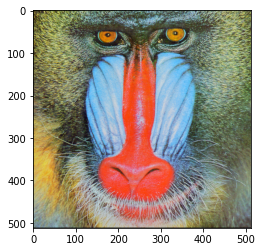

In [122]:
plt.imshow(output_image)

In [157]:
decoding[:, 7::8, :].shape

(512, 512, 3)

In [159]:
a = np.packbits(decoding[:, 7::8, :].reshape(-1))
b = np.where(a == 0)
b

(array([], dtype=int64),)

In [145]:
b[0][0]*8 + 8

210400

In [149]:
b[-8:]

'00000000'

In [133]:
len(remaining_message)

210400

In [111]:
a[-10:]

Array([116, 111,  32, 109,  97, 107, 101,  32, 111, 102], dtype=uint8)

In [124]:
decoding = np.unpackbits(output_image, axis = 1)
message1 = ''.join(str(v) for v in list(decoding[:, 7::8, :].reshape(-1)))
a = message1
print(bits2text(message1))

IN THE SHADE of the house, in the sunshine of the
riverbank near the boats, in the shade of the Sal-
wood forest, in the shade of the fig tree is where Sid-
dhartha grew up, the handsome son of the Brahman, the
young falcon, together with his friend Govinda, son of
a Brahman. The sun tanned his light shoulders by the
banks of the river when bathing, performing the sacred
ablutions, the sacred offerings. In the mango grove,
shade poured into his black eyes, when playing as a boy,
when his mother sang, when the sacred offerings were
made, when his father, the scholar, taught him, when the
wise men talked. For a long time, Siddhartha had been
partaking in the discussions of the wise men, practis-
ing debate with Govinda, practising with Govinda the
art of reflection, the service of meditation. He already
knew how to speak the Om silently, the word of words,
to speak it silently into himself while inhaling, to speak
it silently out of himself while exhaling, with all the
concentration of h

In [147]:
message2 = ''.join(str(v) for v in list(decoding[:, 6::8, :].reshape(-1)[:b[0][0]*8 + 8]))
b = message2
print(bits2text(message2))

ferings to the gods? For whom
else were offerings to be made, who else was to be wor-
shipped but Him, the only one, the Atman? And where
was Atman to be found, where did He reside, where did
his eternal heart beat, where else but in one’s own self,
in its innermost part, in its indestructible part, which ev-
eryone had in himself? But where, where was this self,
this innermost part, this ultimate part? It was not flesh
and bone, it was neither thought nor consciousness, thus
the wisest ones taught. So, where, where was it? To
reach this place, the self, myself, the Atman, there was
another way, which was worthwhile looking for? Alas,
and nobody showed this way, nobody knew it, not the
father, and not the teachers and wise men, not the holy
sacrificial songs! They knew everything, the Brahmans
and their holy books, they knew everything, they had
taken care of everything and of more than everything,
the creation of the world, the origin of speech, of food,
of inhaling, of exhaling, the 

In [79]:
decoding = np.unpackbits(output_image, axis = 1)
message = ''.join(str(v) for v in list(decoding[:, 7::8, :].reshape(-1)[:(len(arr_secret_message))]))
print(bits2text(message))

If I told you things I did before
Told you how I used to be
Would you go along with someone like me?
If you knew my story word for word
Had all of my history
Would you go along with someone like me?
I did before and had my share
It didn't lead nowhere
I would go along with someone like you
It doesn't matter what you did
Who you were hanging with
We could stick around and see this night through
And we don't care about the young folks
Talkin' 'bout the young style
And we don't care about the old folks
Talkin' 'bout the old style too
And we don't care about their own faults
Talkin' 'bout our own style
All we care 'bout is talking
Talking only me and you
Usually when things has gone this far
People tend to disappear
No one will surprise me unless you do
I can tell there's something goin' on
Hours seems to disappear
Everyone is leaving I'm still with you
It doesn't matter what we do
Where we are going to
We can stick around and see this night through
And we don't care about the young folks


In [128]:
a = np.arange(27).reshape(3,3,3)
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [134]:
a[:,0,0]

array([ 0,  9, 18])

In [132]:
a[1,0,0]

9

In [115]:
np.all(temp[:len(arr_secret_message)] == arr_secret_message)

True

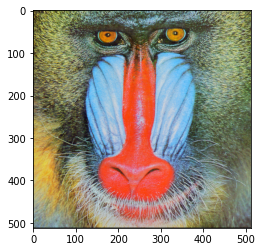

In [36]:
coded_image = np.packbits(bitsimage2, axis = 1)
plt.imshow(coded_image)
iio.imwrite('secret_full_baboon2.png', coded_image)

In [105]:
decoding[0:row_index, bits_plane['1']::8, band_index].reshape(-1)

Array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [104]:
str(v) for v in list(decoding[0:row_index, bits_plane['1']::8, band_index]

SyntaxError: invalid syntax (1309243178.py, line 1)

In [37]:
decoding = np.unpackbits(coded_image, axis = 1)
message = ''.join(str(v) for v in list(decoding[0:row_index, bits_plane['1']::8, band_index].reshape(-1)))
print(bits2text(message))

If I told you things I did before
Told you how I used to be
Would you go along with someone like me?
If you knew my story word for word
Had all of my history
Would you go along with someone like me?
I did before and had my share
It didn't lead nowhere
I would go along with someone like you
It doesn't matter what you did
Who you were hanging with
We could stick around and see this night through
And we don't care about the young folks
Talkin' 'bout the young style
And we don't care about the old folks
Talkin' 'bout the old style too
And we don't care about their own faults
Talkin' 'bout our own style
All we care 'bout is talking
Talking only me and you
Usually when things has gone this far
People tend to disappear
No one will surprise me unless you do
I can tell there's something goin' on
Hours seems to disappear
Everyone is leaving I'm still with you
It doesn't matter what we do
Where we are going to
We can stick around and see this night through
And we don't care about the young folks


In [ ]:
# Abordagem diferente

In [204]:
arr_text[outer_part_len: (outer_part_len + middle_part_len)].reshape(0,512)

array([], shape=(0, 512), dtype=uint8)

In [187]:
print(bits_image[0:row_index, bits_plane['1']::8, band_index].shape)
arr_text[outer_part_len: (outer_part_len + middle_part_len)].shape

(0, 512)


(0,)

In [182]:
teste = [0,1,2,3,4,5,6]
teste[:2]
teste[2:]

[2, 3, 4, 5, 6]

In [172]:
col_index

176

In [149]:
len(bin_text)

176

In [148]:
len(arr_text)

176